# Part I - Ford GoBike System Data
## by Oluwanifemi Favour Olajuyigbe

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
<li><a href="#ueda">Univariate Exploration</a></li>
<li><a href="#beda">Bivariate Exploration</a></li>
<li><a href="#meda">Multivariate Exploration</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project explored the Ford GoBike Trip dataset, which consists of information of about 180 thousand trips made in February, 2019 in a bike-sharing system covering most of San  Francisco Bay Area. The dataset contains 16 features, which are as follows.


#### Dataset Columns and Description
- duration_sec: Duration of the trip in seconds.
- start_time: Time the trip started.
- end_time: Time the trip ended.
- start_station_id: Identification of the start station.
- start_station_name: Name of the start station.
- start_station_latitude: Latitude of the start station.
- start_station_longitude: Longitude of the start station.
- end_station_id: Identification of the end station.
- end_station_name: Name of the end station.
- end_station_latitude: Latitude of the end station.
- end_station_longitude: Longitude of the end station.
- bike_id: Identification of the bike.
- user_type: Indicates whether the user is a customer or a subscriber.
- member_birth_year: Year user was born. 
- member_gender: Gender of user (Male, Female, Other).
- bike_share_for_all_trip: Yes or No.


<a id='wrangling'></a>
## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# load in the dataset into a pandas dataframe
df =  pd.read_csv('201902-fordgobike-tripdata.csv')

### Assessing Data

In [3]:
# get first 5 rows of dataset
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 183412 rows and 16 columns


In [5]:
# get summary information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

- start_time and end_time should be in datetime format
- user_type, member_gender, and bike_share_for_all_trip should be categorical
- member_birth_year should be integer

In [6]:
# check for missing values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
cat_col = ['start_station_name', 'end_station_name', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip']

for cat in cat_col:
    print(df[cat].value_counts())
    print('-'*100)
    

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
Palm St at Willow St                                            4
21st Ave at International Blvd                                  4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64
----------------------------------------------------------------------------------------------------
San Francisco Caltrain Station 2  (Townsend St at 4th St)    4857
Market St at 10th St                                   

In [8]:
# check if there are duplicated rows
df.duplicated().sum()

0

In [9]:
# get descriptive statistics
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

>  There is information about 183412 individual rides in the dataset with 16 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender,and bike_share_for_all_trip).

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in figuring out the factors that affect the duration of a ride (duration_sec) and the time/period most trips are taken.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I believe the start_time, user_type, member_birth_year, and member_gender will help support my investigation into what really affects the length and time of ride.

Before moving on to the exploratory visualizations, I will fix some of the data quality issues present in the dataset.

#### Quality Issues
- Extraneous columns ('start_station_id', 'start_station_latitude','start_station_longitude', 'end_station_name', 'end_station_id', 'end_station_latitude', 'end_station_longitude', 'bike_id','bike_share_for_all_trip')
- Erroneous datatypes (start_time should be in datetime format, user_type, and member_gender should be categorical, member_birth_year should be integer)
- Missing values in columns 'member_birth_year', 'member_gender', and 'start_station_name'.

### Data Cleaning

In [10]:
# createclean copy of dataset
df_clean = df.copy()

#### Extraneous columns 

- Drop columns ('start_station_id', 'start_station_latitude','start_station_longitude', 'end_station_name', 'end_station_id', 'end_station_latitude', 'end_station_longitude', 'bike_id','bike_share_for_all_trip')


In [11]:
extra_cols = ['end_time', 'start_station_id', 'start_station_latitude','start_station_longitude', 'end_station_id', 
              'end_station_name','end_station_latitude','end_station_longitude','bike_id','bike_share_for_all_trip']
df_clean = df_clean.drop(extra_cols, axis=1)

# test drop
df_clean.head(1)

,duration_sec,start_time,start_station_name,user_type,member_birth_year,member_gender
0,52185,2019-02-28 17:32:10.1450,Montgomery St BART Station (Market St at 2nd St),Customer,1984.0,Male


#### Missing values 
- Drop all rows with missing values in columns 'member_birth_year', 'member_gender, and 'start_station_name''


In [12]:
# drop rows with missing values
df_clean = df_clean.dropna()

# test drop
df_clean.isnull().sum()

duration_sec          0
start_time            0
start_station_name    0
user_type             0
member_birth_year     0
member_gender         0
dtype: int64

#### Erroneous datatypes 
- start_time should be in datetime format
- user_type, and member_gender should be categorical
- member_birth_year should be integer


In [13]:
# create function to change datatype
def change_dtype(column, dtype):
    '''changes the datatype of a column to the specified datatype'''
    df_clean[column] = df_clean[column].astype(dtype)

In [14]:
# change datatypes
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])

columns = ['user_type', 'member_gender', 'member_birth_year']
dtypes = ['category', 'category', 'int64']
for col, dtype in zip(columns, dtypes):
    change_dtype(col, dtype)

In [15]:
# test change
df_clean.dtypes

duration_sec                   int64
start_time            datetime64[ns]
start_station_name            object
user_type                   category
member_birth_year              int64
member_gender               category
dtype: object

 Extract day, weekday, and hour from start_time column , and create a new feature period (grouping of hours into periods in a day) to aid exploration.

In [16]:
df_clean['start_day'] = df_clean['start_time'].dt.day
df_clean['start_weekday'] = df_clean['start_time'].dt.day_name()
df_clean['start_hour'] = df_clean['start_time'].dt.hour

In [17]:
# group 4 hours into different periods in a day
df_clean['start_period'] = (df_clean['start_hour'] % 24 + 4)//4
df_clean['start_period'] = df_clean['start_period'].replace({1:'Late Night',
                            2: 'Early Morning', 3: 'Morning', 4:'Noon',
                            5: 'Evening', 6:'Night'})

No need to extract the month and year from start_time since all the trips started in February, 2019

In [18]:
df_clean = df_clean.drop('start_time', axis=1)

In [19]:
df_clean.head(1)

,duration_sec,start_station_name,user_type,member_birth_year,member_gender,start_day,start_weekday,start_hour,start_period
0,52185,Montgomery St BART Station (Market St at 2nd St),Customer,1984,Male,28,Thursday,17,Evening


In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   duration_sec        174952 non-null  int64   
 1   start_station_name  174952 non-null  object  
 2   user_type           174952 non-null  category
 3   member_birth_year   174952 non-null  int64   
 4   member_gender       174952 non-null  category
 5   start_day           174952 non-null  int64   
 6   start_weekday       174952 non-null  object  
 7   start_hour          174952 non-null  int64   
 8   start_period        174952 non-null  object  
dtypes: category(2), int64(4), object(3)
memory usage: 11.0+ MB


<a id='ueda'></a>
## Univariate Exploration



### Distribution of the trip duration


In [21]:
# function to set the labels for the x-axis, y-axis and the title of the plots
def label(x_label,y_label,title):
    '''Sets the labels for the x-axis, y-axis and the title of the plots'''
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()   

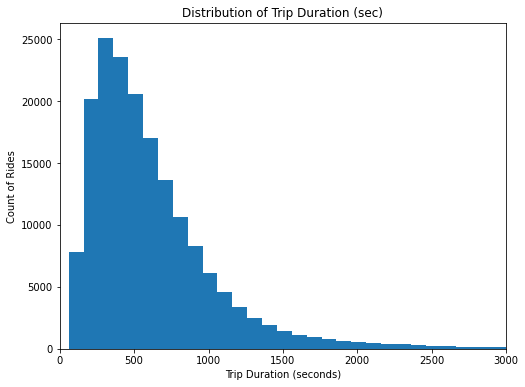

In [22]:
plt.figure(figsize=(8,6))
bins = np.arange(60, df_clean.duration_sec.max()+100, 100)
plt.hist(data=df_clean, x='duration_sec', bins = bins)
plt.xlim(0,3000)
label('Trip Duration (seconds)', 'Count of Rides', 'Distribution of Trip Duration (sec)')

The duration_sec is skewed to the right as there's a long tail in the distribution, so let's use a log scale instead

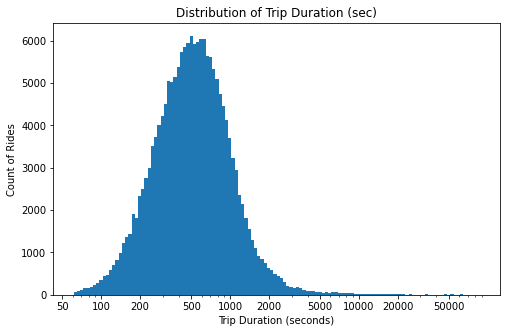

In [23]:
# use log scale
log_binsize = 0.025
bins = 10 ** np.arange(np.log10(df_clean.duration_sec.min()), np.log10(df_clean.duration_sec.max())+log_binsize, log_binsize)
ticks = [50,100,200,500,1000,2000,5000,10000,20000,50000]
labels = [f'{x}' for x in ticks]

plt.figure(figsize=(8, 5))
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
label('Trip Duration (seconds)', 'Count of Rides', 'Distribution of Trip Duration (sec)')

After plotting duration_sec on a log scale, we see that the distribution is unimodal, with it's peak between 300 and 1500 seconds. There are also some outliers in the duration_sec column, so I will be filtering out all durations greater than 10000 seconds.

In [24]:
df_clean = df_clean.query('duration_sec <= 10000')

Since it is easier to relate to minutes than seconds, I will be creating a new feature of duration in minutes

In [25]:
df_clean['duration_min'] = df_clean['duration_sec']/60

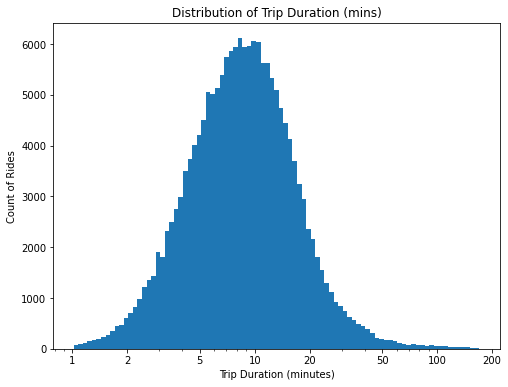

In [26]:
log_binsize = 0.025
bins = 10 ** np.arange(np.log10(df_clean.duration_min.min()), np.log10(df_clean.duration_min.max())+log_binsize, log_binsize)
ticks = [1, 2, 5, 10, 20, 50,100,200]
labels = [f'{x}' for x in ticks]

plt.figure(figsize=(8, 6))
plt.hist(data = df_clean, x ='duration_min', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
label('Trip Duration (minutes)', 'Count of Rides', 'Distribution of Trip Duration (mins)')

The peak period was about 4 to 20 mins. We can therefore deduce that the average duration for trips is between 5 to 20 minutes

### Exploring the time columns: When are most trips taken in terms of day, weekday, period and hour?

In [27]:
# set the base color
base_color = sns.color_palette()[0]

# change start_weekday to categorical variable
days = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_cat = pd.api.types.CategoricalDtype(categories=days, ordered=True)
df_clean.start_weekday = df_clean.start_weekday.astype(days_cat)

#change start_period to categorical variable
period = ['Late Night','Early Morning','Morning','Noon','Evening','Night']
period_cat = pd.api.types.CategoricalDtype(categories=period, ordered=True)
df_clean.start_period = df_clean.start_period.astype(period_cat)

In [28]:
# function to plot the distribution of a feature on a countplot
def countplot(x_axis,x_label,y_label,title,rotation=0):
    '''Plots the distribution of a feature on a countplot and 
    sets the labels for the x-axis, y-axis and the title of the plots'''
    plt.figure(figsize=(10,7))
    sns.countplot(data=df_clean, x=x_axis, color=base_color)
    plt.xticks(rotation=rotation)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()   

#### Check count distribution of rides per start day

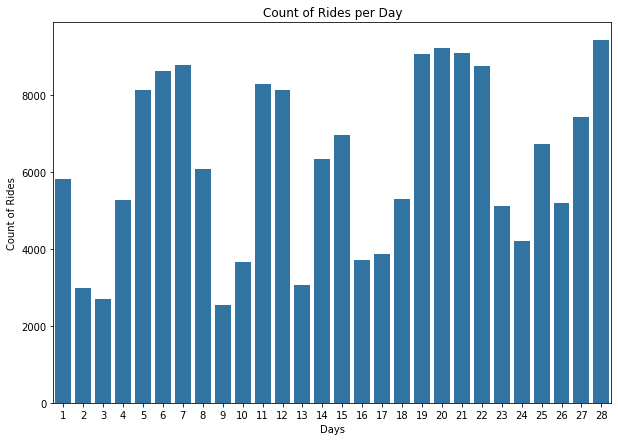

In [29]:
countplot('start_day', 'Days', 'Count of Rides', 'Count of Rides per Day')

The plot above shows a trend in the number of rides per day, could this be associated with the day of the week?

In [30]:
# group day by weekday
day_by_weekday = df_clean.groupby(['start_day','start_weekday']).mean().replace(0,np.nan)
day_by_weekday = day_by_weekday.dropna().reset_index(level=0)


In [31]:
day_by_weekday['start_day'][:7]

start_weekday
Friday       1
Saturday     2
Sunday       3
Monday       4
Tuesday      5
Wednesday    6
Thursday     7
Name: start_day, dtype: int64

From here, we see that day 2 and 3, which both have low count rides, are associated with Saturday and Sunday, respectively. 

Next, let's take a look at all days associated with Saturday and Sunday 

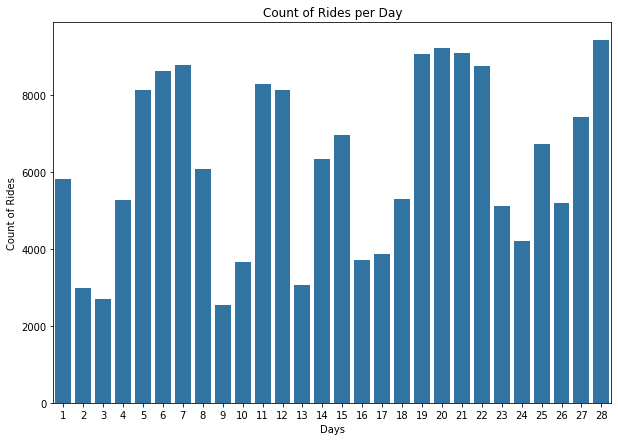

start_weekday
Saturday     2
Sunday       3
Saturday     9
Sunday      10
Saturday    16
Sunday      17
Saturday    23
Sunday      24
Name: start_day, dtype: int64

In [32]:
countplot('start_day', 'Days', 'Count of Rides', 'Count of Rides per Day')
day_by_weekday.query('start_weekday in ("Saturday", "Sunday")')['start_day']

It can be observed that Saturdays and Sundays often had the lowest ride count. Let's now explore  the start_weekday column to further confirm our observations.

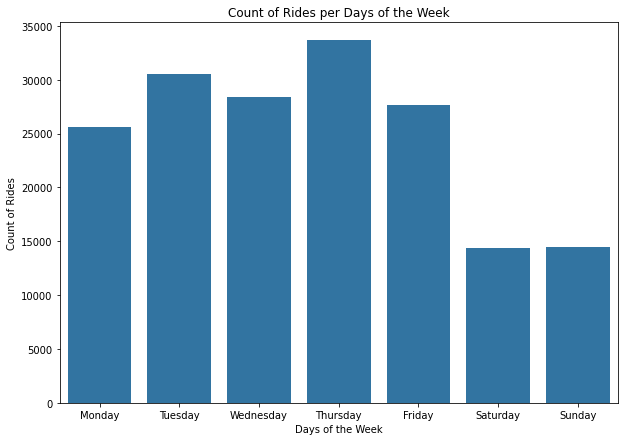

In [33]:
countplot('start_weekday', 'Days of the Week', 'Count of Rides', 'Count of Rides per Days of the Week')

Observation confirmed! People generally took bike rides during the week than weekends, with Saturday and Sunday having the least turn out rate. Then during the weekday, Thursday had the most bike rides.

Now that we have looked at the days and weekdays, lets check the trend of the period most people take their rides

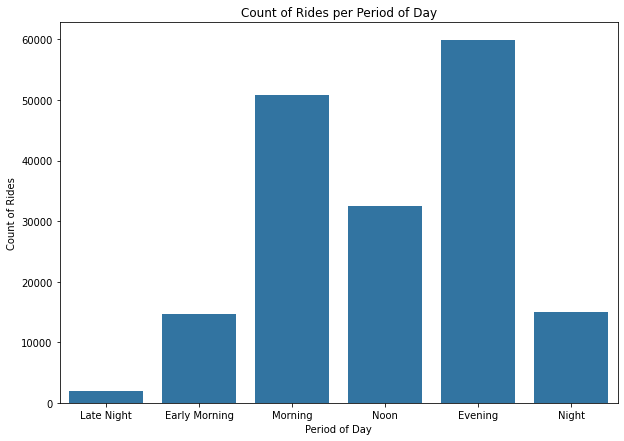

In [34]:
countplot('start_period', 'Period of Day', 'Count of Rides', 'Count of Rides per Period of Day')

Most people take rides in the evenings and mornings. Mornings may be when going to work and evenings when coming back from work or just having an evening workout. People rarely took nights in the Late Nights which is between 12 and 3:59am, which isn't surprising as people are expected to be sleeping at that period.

Now, let's look at the hours during the day more specifically

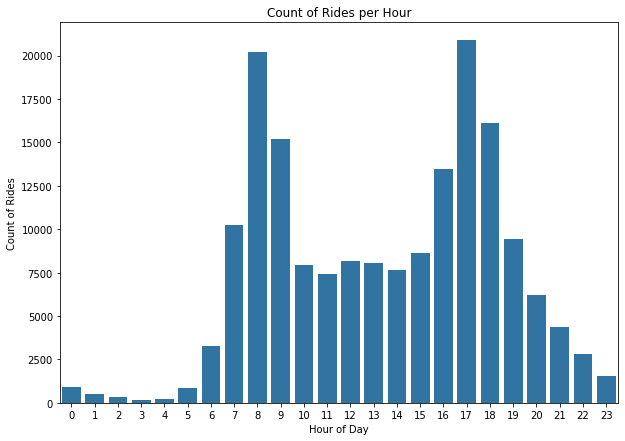

In [35]:
countplot('start_hour', 'Hour of Day', 'Count of Rides', 'Count of Rides per Hour')

Here we see more specifically that more than 20,000 people have bike trips during the hours of 5pm and 8am, while between 1 and 4am not up to a thousand people go on a bike trip. Then an average of 7500 people had bike trips from 10am to 3pm which is expected because most people would be at work around that time.

> To answer the question 'When are most trips taken in terms of day, weekday, period and hour?' posed at the beginning, from our exploration it is observed that most trips are taken during the weekday, specifically on Thursdays. Then the period and hour with the most trips taken is in the morning and evening and in the hours of 8am and 5pm respectively.

> Then the least trips were taken during weekends, in late nights and at 3am

### Characteristics of Individuals who took rides

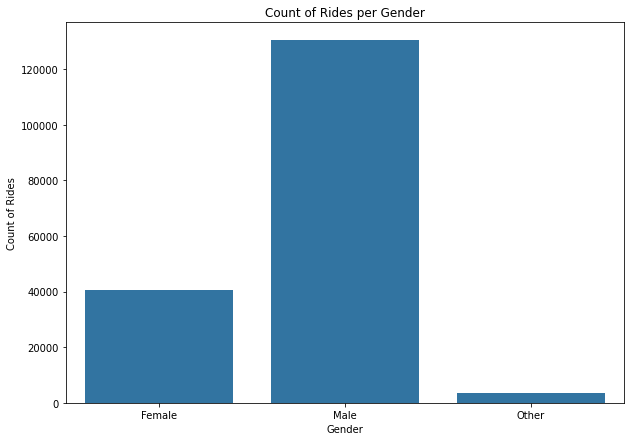

In [36]:
countplot('member_gender', 'Gender', 'Count of Rides', 'Count of Rides per Gender')

More males took rides than females

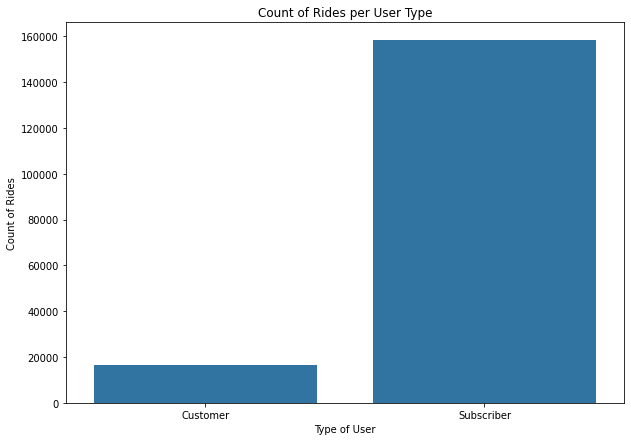

In [37]:
countplot('user_type', 'Type of User', 'Count of Rides', 'Count of Rides per User Type')

There were more subscribers than customers

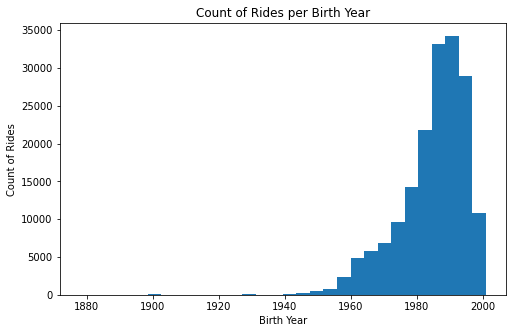

In [38]:
plt.figure(figsize=(8,5))
plt.hist(data=df_clean, x='member_birth_year', bins=30)
label('Birth Year', 'Count of Rides', 'Count of Rides per Birth Year')

The age feature is skewed to the left, so I will filter out the outliers, that is, all values below 1940

In [39]:
df_clean = df_clean.query('member_birth_year >= 1940')

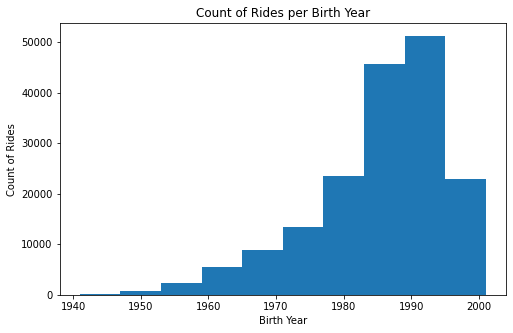

In [40]:
plt.figure(figsize=(8,5))
plt.hist(data=df_clean, x='member_birth_year')
label('Birth Year', 'Count of Rides', 'Count of Rides per Birth Year')

Most individuals were born between 1985 and 1995. It will be better to create an age column for better visualization

In [41]:
# I will be subtracting the member birth year from the year 2019 since the data is from 2019 
df_clean['age'] = 2019 - df_clean['member_birth_year']

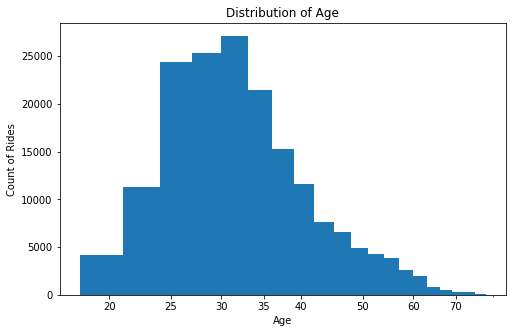

In [42]:
plt.figure(figsize=(8,5))
plt.hist(data=df_clean, x='age', bins=20)
plt.xscale('log')
plt.xticks([20,25,30,35,40,50,60,70], ['20','25','30','35','40','50','60','70'])
label('Age', 'Count of Rides', 'Distribution of Age')

From the distribution above, we can see that most people that took the bike trips were between the ages of 25 and 35

#### Next we look at the Start stations with the most rides

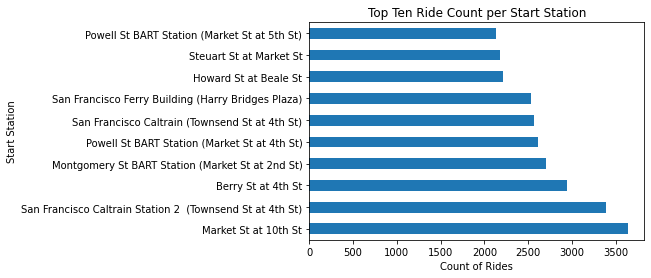

In [43]:
df_clean['start_station_name'].value_counts()[:10].plot(kind='barh')
label('Count of Rides', 'Start Station', 'Top Ten Ride Count per Start Station')

The top ten start stations with the highest number of rides taken include Market St at 10th St, San Francisco Caltrain Station 2  (Townsend St at 4th St), Berry St at 4th St, Montgomery St BART Station (Market St at 2nd St), Powell St BART Station (Market St at 4th St), San Francisco Caltrain (Townsend St at 4th St), San Francisco Ferry Building (Harry Bridges Plaza), Howard St at Beale St, Steuart St at Market St, and Powell St BART Station (Market St at 5th St), from highest to lowest.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration_sec variable took on a large range of values and was highly skewed to the right, hence I performed a log transformation on the variable, which made the data look unimodal, with its peak between 5 and 20 minutes. I also identified some outliers which I removed from the dataset.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Of the features I investigated, the member_birth_year column was highly skewed to the left. This was caused by a number of quite unrealistic years of birth. I filtered out appropriately before continuing with the exploration, created a new column, age, on which I then performed a log transformation on.

> I also extracted start day, weekday, hour and period from the start time column to further aid my exploration.

<a id='beda'></a>
## Bivariate Exploration


### Does the duration of trip depend on the week day or period the individual took the trip?

I will start by checking the relationship between the duration in minutes and day of the week and then with the period in the day the trip started.

In [44]:
def box_plot(y_axis,y_label,title):
    '''shows the box plot of a feature with the duration_min and 
    sets the labels for the x-axis, y-axis and the title of the plots'''
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df_clean, x='duration_min', y=y_axis, color=base_color)
    plt.xscale('log')
    plt.xticks(ticks, labels)
    plt.title(title)
    plt.xlabel('Duration in minutes')
    plt.ylabel(y_label)
    plt.show()

start_weekday
Monday       10.654072
Tuesday      10.171950
Wednesday    10.280481
Thursday     10.486802
Friday       10.579047
Saturday     12.517621
Sunday       12.771226
Name: duration_min, dtype: float64


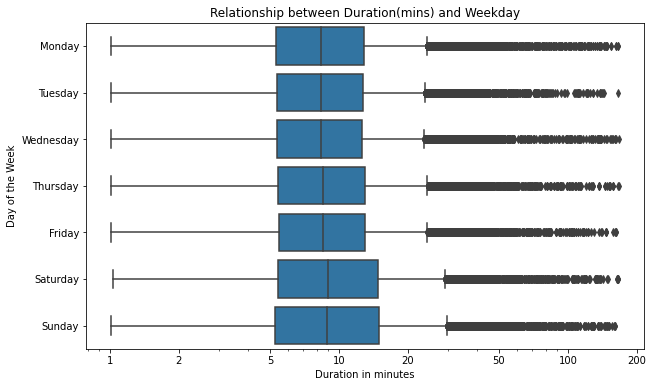

start_period
Late Night       10.494337
Early Morning     9.545135
Morning          10.647882
Noon             12.296988
Evening          10.629484
Night             9.936810
Name: duration_min, dtype: float64


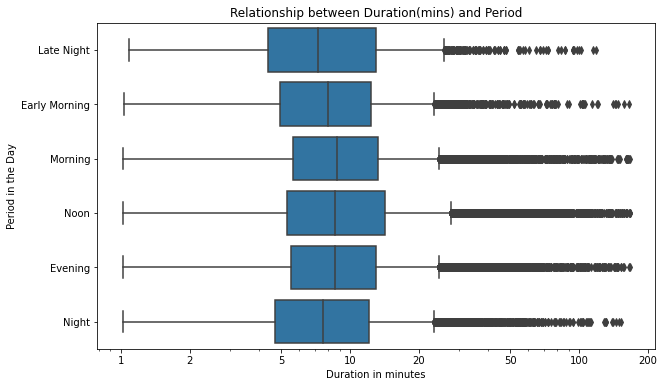

In [45]:
start_time_cat = ['start_weekday', 'start_period']
y_labels = ['Day of the Week', 'Period in the Day']
title_list = ['Relationship between Duration(mins) and Weekday', 'Relationship between Duration(mins) and Period']
for time, y_label, title in zip(start_time_cat,y_labels,title_list):
    print(df_clean.groupby(time).mean()['duration_min'])
    box_plot(time,y_label,title)

- From the first box plot above, we see that the day of the weeks had just little effect on the duration of the trip. The weekdays, that is Monday to Friday, had roughly the same average trip duration, while the weekends trips were slightly longer than that of the weekdays. 

- From the duration_min vs start_period plot, trips started at noon had the longest average trip duration. 

#### Does the duration of ride depend on the gender and user type of the individuals?
Next, let's move on to exploring the duration of trip with other categorical values such as member_gender and user_type

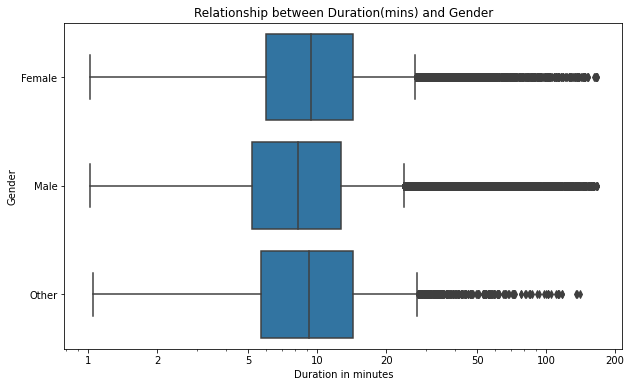

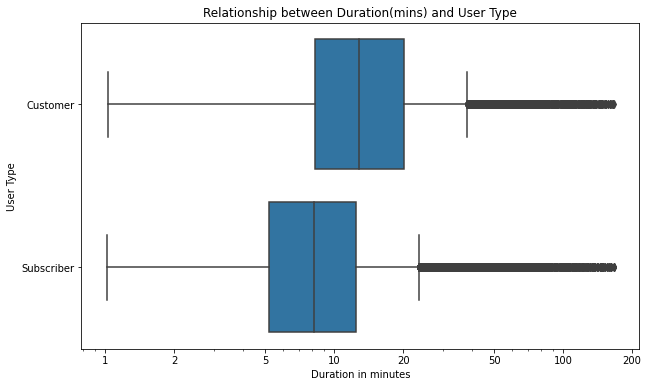

In [46]:
cat_list = ['member_gender','user_type']
y_label_list = ['Gender', 'User Type']
cat_title_list = ['Relationship between Duration(mins) and Gender', 'Relationship between Duration(mins) and User Type']
for cat, y_label, title in zip(cat_list,y_label_list,cat_title_list):
    box_plot(cat,y_label,title)

- The male gender had a slightly shorter trip duration than the female and other genders
- The customers generally had a longer average trip duration than the subscribers

#### Relationship between the gender and the user type

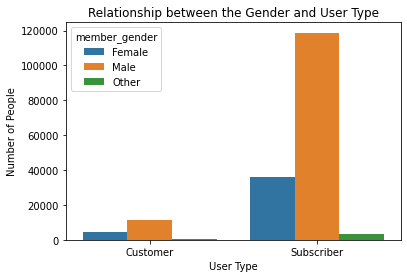

In [47]:
sns.countplot(data=df_clean, x='user_type', hue='member_gender')
label('User Type', 'Number of People', 'Relationship between the Gender and User Type')

The plot above just shows the number of people in each category, now let's check the proportion of the gender in each user type

In [48]:
def crosstab(x_axis, y_axis, rotation=0):
    '''Plots the proportion between two variables'''
    pd.crosstab(df_clean[x_axis], df_clean[y_axis], normalize='index').plot.bar()
    plt.xticks(rotation=rotation)
    print(pd.crosstab(df_clean[x_axis], df_clean[y_axis], normalize='index'))

member_gender    Female      Male     Other
user_type                                  
Customer       0.278656  0.694504  0.026841
Subscriber     0.228389  0.751503  0.020108


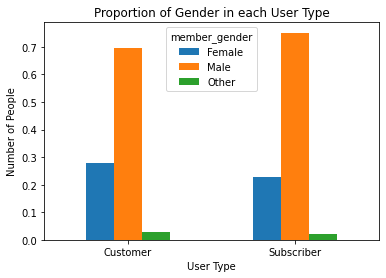

In [49]:
crosstab('user_type','member_gender')
label('User Type', 'Number of People', 'Proportion of Gender in each User Type')

Males were more in the dataset, so it's no surprise that there were more males than females in both user types (customer and subscriber). However, from the plot, we can see that there are more female and other gender customers than there are subscribers, and there are more male subscribers than there are customers

#### Relationship between the weekday and the user type

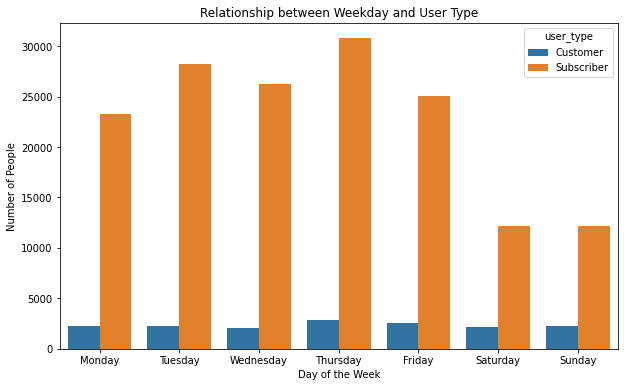

In [50]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_clean, x='start_weekday', hue='user_type')
label('Day of the Week','Number of People', 'Relationship between Weekday and User Type')

Fom the plot above, we see the number of customers and subscribers that took rides each day of the week. Next, let's take a look at the proportion

user_type      Customer  Subscriber
start_weekday                      
Monday         0.089592    0.910408
Tuesday        0.073779    0.926221
Wednesday      0.073849    0.926151
Thursday       0.084394    0.915606
Friday         0.091334    0.908666
Saturday       0.149046    0.850954
Sunday         0.156863    0.843137


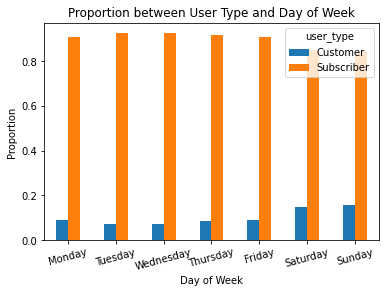

In [51]:
crosstab('start_weekday','user_type',15)
label('Day of Week', 'Proportion',  'Proportion between User Type and Day of Week')

More customers make trips during the weekends than weekdays

#### Relationship between the period and the user type

user_type      Customer  Subscriber
start_period                       
Late Night     0.092236    0.907764
Early Morning  0.062072    0.937928
Morning        0.087941    0.912059
Noon           0.132524    0.867476
Evening        0.090304    0.909696
Night          0.077124    0.922876


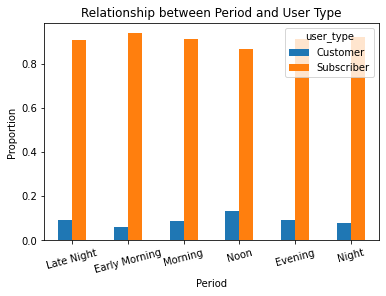

In [52]:
crosstab('start_period', 'user_type', 15)
label('Period','Proportion', 'Relationship between Period and User Type')

Subscribers take rides most at noon and least in the early mornings. Ironically, most customers start their rides in the early mornings least at noon.

#### Age vs User Type

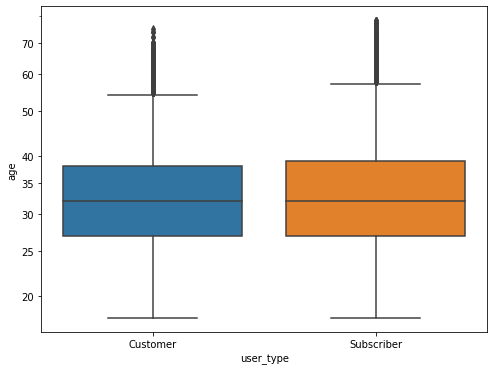

In [53]:
# age vs user type
plt.figure(figsize=(8,6))
sns.boxplot(data=df_clean, x='user_type', y='age')
plt.yscale('log')
plt.yticks([20,25,30,35,40,50,60,70], ['20','25','30','35','40','50','60','70']);

The subscribers were slightly older than customers


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

 -  Some of the relationships I observed during exploration include the following:
- The weekdays, that is Monday to Friday, had roughly the same average trip duration, while the weekends trips were slightly longer than that of the weekdays.
-  Trips that started at noon had the longest average trip duration.
-  The male gender had a slightly shorter trip duration than the female and other genders
- The customers generally had a longer average trip duration than the subscribers
- More customers make trips during the weekends than weekdays
- Most subscribers take rides at noon and rarely in the early mornings, while most customers start their rides in the early mornings and least at noon.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- Yes, some interesting relationships I observed are that there were more female and other gender customers than there were subscribers, and there are more male subscribers than there are customers and then I noticed that the subscribers were slightly older than customers

<a id='meda'></a>
## Multivariate Exploration



In [54]:
def facetgrid(col, x_axis):
    g = sns.FacetGrid(data=df_clean, col=col, col_wrap=3, height=4)
    g.map(sns.boxplot, x_axis, 'duration_min')
    plt.yscale('log')
    plt.yticks(ticks, labels);

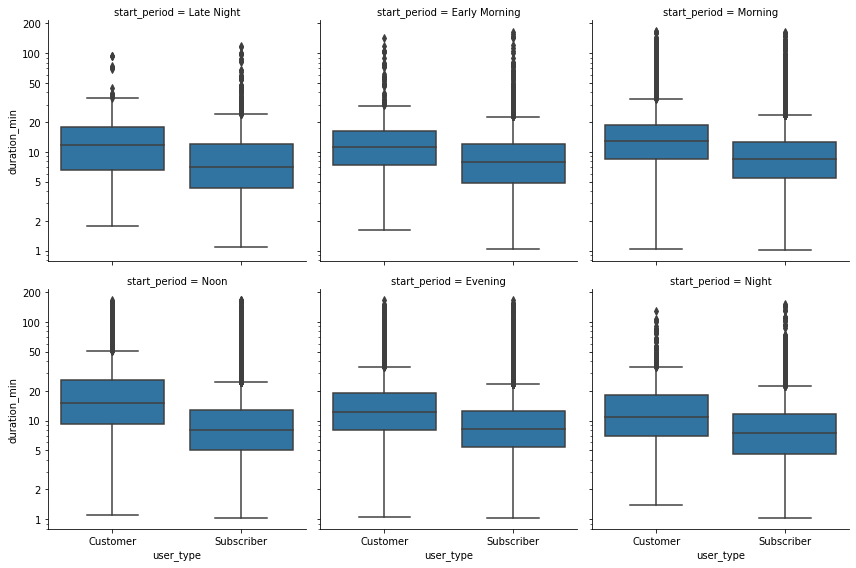

In [55]:
facetgrid('start_period', 'user_type')

Customers generally had longer rides than subscribers, especially at noon

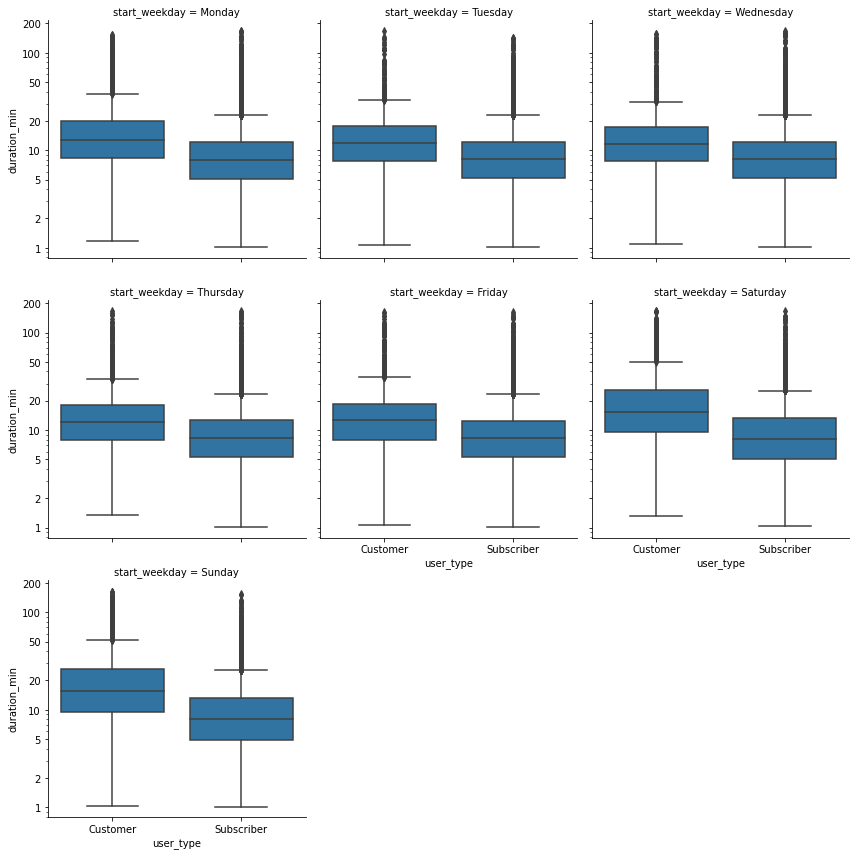

In [56]:
facetgrid('start_weekday', 'user_type')

The customers generally had longer trips than subscribers regardless of the day of the week. They had the longest trips on Saturdays and Sundays

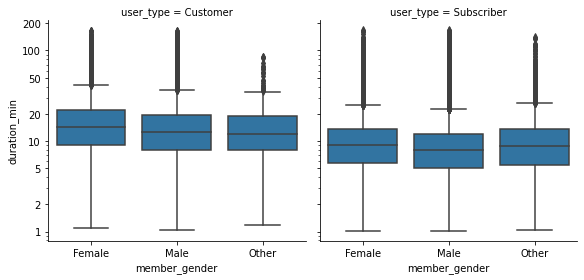

In [57]:
facetgrid('user_type','member_gender')

All customer regarless of gender ride longer than subscribers. However, female customer have the longest average ride duration. Then for subscribers, the other gender has the longest ride duration. The males in both user types go on the shortest trips

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

From the mutivariate plots, I observed that customers generally have longer trips than subscribers regardless of the time peiod of day, day in the week or gender. Then the days with the longest rides usually fell on the weekends


In [58]:
# save cleaned dataset to a csv file
df_clean.to_csv('clean_ford_gobike_dataset.csv', index=False)

<a id='conclusions'></a>
## Conclusions
This project had the goal of investigating factors that affect the duration of a ride and the time/period most trips are taken. From my analysis and explorations, I was able to find out the key attributes that first of all, had an impact on the duration of a trip and second, had an effect on the time a ride is started.
- Findings on the factors that had an effect on trip duration
 - A factor that had an effect on duration is time period of day. The trips that started at noon had the longest average trip duration.
 - It was also observed that day of week had an effect on trip duration. Individuals had longer trips during the weekends, that is, Saturday and Sunday, than weekdays (Monday to Friday)
 - Another main factor was user type. It was observed and proven in many explorations that customers had a longer trip than subscribers, regardless of whetever time of day, day of week or gender that might be involved.

- Findings on the factors that had an effect on the time most trips are taken
 - A factor was the day of the week. Most trips were taken during weekdays, with Thursday topping the chart with the highest number of trips started. Saturday and Sunday had the lowest turn up rate.
 - The period of day was also an important factor. People mostly took rides in the mornings and evenings, but more in the evenings. Then, only a handful of people took rides in the late nights.
 - More specific than the period of day that serves as another important factor is the hour of day. Most rides were taken in the hours of 8am and more at 5pm. Then the least trips were taken at 3am.